# DESCRIPTION
This dataset is composed of 1300 samples with 30 features each. The first column is the sample id. The second column in the dataset represents the label. There are 3 possible values for the labels. The remaining columns are numeric features.

Your task is the following: assuming that you want to classify this data with a Random Forest (implemented by sklearn.ensemble.ExtraTreesClassifier), you should determine whether applying PCA to this dataset is useful, and if so what number of components you would choose to use. At the end of the analysis, you should have chosen an optimal strategy, including the optimal set of parameters for the classifier: write this choice explicitly in the conclusions of your notebook.

Your notebook should detail the procedure you have used to choose the optimal parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on the procedure employed, which should balance practical considerations (one may not be able to exhaustively explore all possible combinations of the parameters) with the desire for achieving the best possible performance in the least amount of time.

Bonus points may be assigned for particularly clean/nifty code and/or well- presented results.

You are also free to attempt other strategies beyond the one in the assignment (which however is mandatory!).

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get The Data

In [2]:
dataset = pd.read_csv("C:/mldata_0023085293.csv")
dataset.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,0,0,1.236409,0.771355,-2.868882,-0.274193,-4.462532,0.877284,-1.015337,-1.118017,...,-0.039983,-0.009710,-2.705795,-0.690361,-0.316339,-0.414878,-0.955152,2.316707,0.783080,-0.126626
1,1,0,-0.942554,-2.020196,1.441681,-1.951818,5.257332,-1.179665,2.213923,4.120665,...,1.823328,-0.994799,7.438069,-0.013862,3.063861,0.620853,3.785254,1.340708,-0.597570,-0.693184
2,2,2,-5.138842,1.931266,-0.116477,0.238987,3.653463,-0.217843,2.080201,-0.618279,...,-0.296020,1.631100,4.281124,1.209495,2.686192,-0.375291,-0.311236,0.027892,0.793402,-0.263684
3,3,1,5.107390,2.174468,-0.530112,-2.022942,-1.170979,1.451811,0.290078,-4.685610,...,-1.952075,-0.832772,-4.948900,-1.089610,0.600683,-0.495996,1.013603,-0.309740,2.869062,4.331348
4,4,1,-4.554848,0.704647,2.259577,0.720146,2.997572,-1.962074,-5.670781,-0.078485,...,-0.399755,-0.094618,4.385029,0.977540,0.397214,-1.427414,3.225752,-2.823368,-0.182694,-0.616885


# Prepare The Data for Machine Learning

In [3]:
features_and_labels = dataset.drop(['Unnamed: 0'], axis = 1)
features_and_labels.head(5)

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,0,1.236409,0.771355,-2.868882,-0.274193,-4.462532,0.877284,-1.015337,-1.118017,-3.985804,...,-0.039983,-0.009710,-2.705795,-0.690361,-0.316339,-0.414878,-0.955152,2.316707,0.783080,-0.126626
1,0,-0.942554,-2.020196,1.441681,-1.951818,5.257332,-1.179665,2.213923,4.120665,10.022119,...,1.823328,-0.994799,7.438069,-0.013862,3.063861,0.620853,3.785254,1.340708,-0.597570,-0.693184
2,2,-5.138842,1.931266,-0.116477,0.238987,3.653463,-0.217843,2.080201,-0.618279,5.065894,...,-0.296020,1.631100,4.281124,1.209495,2.686192,-0.375291,-0.311236,0.027892,0.793402,-0.263684
3,1,5.107390,2.174468,-0.530112,-2.022942,-1.170979,1.451811,0.290078,-4.685610,-8.296903,...,-1.952075,-0.832772,-4.948900,-1.089610,0.600683,-0.495996,1.013603,-0.309740,2.869062,4.331348
4,1,-4.554848,0.704647,2.259577,0.720146,2.997572,-1.962074,-5.670781,-0.078485,-0.737029,...,-0.399755,-0.094618,4.385029,0.977540,0.397214,-1.427414,3.225752,-2.823368,-0.182694,-0.616885


In [4]:
features = features_and_labels.iloc[:,1:32]
labels = features_and_labels.iloc[:,0]

In [5]:
features.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,-0.343441,-0.028582,0.651257,0.042763,-0.055769,0.116125,-0.091992,0.564160,0.725847,-0.541544,...,0.111770,0.060081,0.491759,0.077744,0.658472,0.095017,0.040942,-0.301614,-0.221538,-0.067193
std,4.522785,2.199578,2.334690,0.947141,4.729897,1.018678,2.261370,2.256805,5.262772,5.488509,...,0.992386,0.972629,4.542981,1.005193,2.219331,0.953503,2.566552,2.446555,2.455131,2.347758
min,-14.587881,-7.019306,-7.403795,-2.996129,-15.269710,-2.735459,-6.766467,-7.837455,-14.915020,-18.837965,...,-2.773053,-3.068873,-13.049808,-3.429527,-5.890095,-2.744412,-8.496302,-7.453862,-8.146613,-8.473661
25%,-3.290708,-1.412309,-0.946001,-0.548070,-3.158695,-0.560071,-1.561373,-0.937777,-2.879963,-4.351741,...,-0.514728,-0.592599,-2.486859,-0.601804,-0.782608,-0.530373,-1.664993,-1.988786,-1.918682,-1.672422
50%,-0.130467,-0.071427,0.750441,0.033857,0.048830,0.140070,-0.018848,0.637414,0.468357,-0.753899,...,0.131210,0.063980,0.538049,0.049241,0.627762,0.069855,0.078482,-0.362535,-0.280480,-0.196361
75%,2.615608,1.371803,2.345049,0.678203,3.297426,0.818290,1.478352,2.136164,4.132365,3.222928,...,0.776825,0.671024,3.590753,0.711522,2.090479,0.726776,1.800349,1.366996,1.448886,1.419888
max,16.436794,6.431381,8.041613,3.354414,16.224226,3.744849,7.721547,7.006356,18.647380,17.790120,...,3.347421,4.600935,15.728791,3.089469,7.771095,3.335487,7.004255,7.317670,7.218143,9.129724


In [6]:
#correlation matrix for basic analysis of data

corr_matrix = features_and_labels.corr()
corr_matrix['label'].sort_values(ascending=False)

label         1.000000
feature_29    0.240976
feature_11    0.158991
feature_5     0.157257
feature_15    0.121522
feature_9     0.112581
feature_12    0.093571
feature_23    0.087008
feature_2     0.054666
feature_22    0.051342
feature_10    0.049764
feature_13    0.044283
feature_14    0.038441
feature_18    0.036718
feature_21    0.029893
feature_27    0.029467
feature_30    0.025187
feature_17    0.025187
feature_4     0.023791
feature_20    0.012903
feature_16    0.004724
feature_24   -0.004720
feature_3    -0.009498
feature_8    -0.013126
feature_6    -0.016001
feature_28   -0.030383
feature_26   -0.035883
feature_7    -0.101819
feature_25   -0.111536
feature_19   -0.117933
feature_1    -0.222850
Name: label, dtype: float64

First we do a basic ExtraTreesClassifier model without hyperparameter tuning or PCA and use that as our baseline for improvement

# Baseline ExtraTrees Model

In [7]:
#perform train/test split and scale the data

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


train_set , test_set = train_test_split(features_and_labels, test_size = 0.2, random_state = 42)

train_set_features = train_set.drop(columns = 'label')
train_set_labels = train_set['label']
test_set_features = test_set.drop(columns = 'label')
test_set_labels = test_set['label']

print(train_set_features.shape)
print(test_set_features.shape)

(1040, 30)
(260, 30)


We will not standardise or do PCA on the whole data set, instead we will split first to avoid information about the distribution of the test set leaking into the model

In [8]:
scaler = StandardScaler()

x_train_std = scaler.fit_transform(train_set_features)

x_test_std = scaler.transform(test_set_features)

print(x_train_std.shape)
print(x_test_std.shape)

(1040, 30)
(260, 30)


In [9]:
x_train_std.mean(axis=0)

array([-2.04964251e-17, -1.45183011e-17,  1.36642834e-17, -2.56205313e-17,
        2.39124959e-17, -2.22044605e-17,  1.19562480e-17, -1.28102657e-18,
        1.70803542e-17, -1.02482125e-17, -6.83214169e-18, -3.41607085e-18,
        0.00000000e+00,  2.39124959e-17,  8.54017711e-18,  2.22044605e-17,
        6.83214169e-18,  1.70803542e-17,  0.00000000e+00, -2.04964251e-17,
       -1.36642834e-17,  8.54017711e-19,  2.56205313e-18, -2.39124959e-17,
        1.28102657e-17, -1.36642834e-17, -1.70803542e-18,  2.90366022e-17,
       -3.41607085e-18,  6.83214169e-18])

In [10]:
y_train = train_set_labels
y_test = test_set_labels

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators = 100, random_state = 42)
clf.fit(x_train_std, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

# Accuracy Measures for Baseline Classifier

In [12]:
from sklearn.metrics import accuracy_score

y_predictions = clf.predict(x_test_std)

print(accuracy_score(y_test, y_predictions))

0.7307692307692307


In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x_train_std, y_train, cv=4, scoring = 'accuracy')

array([0.75478927, 0.75769231, 0.71153846, 0.72972973])

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_test, y_predictions, average = 'weighted')

0.7311249796714914

In [15]:
recall_score(y_test, y_predictions, average = 'weighted')

0.7307692307692307

In [16]:
f1_score(y_test, y_predictions, average = 'weighted')

0.7308318541712372

# Fine Tune the Model

Tune the model for a better accuracy score: Start with randomized search to get an idea where the best hyperparamteres lie, then use more specific grid search technique

In [17]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

max_features = ['log2', 'sqrt']
max_features.append(None)

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

param_grid = { 'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap} 
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['log2', 'sqrt', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [18]:
clf_RCV = ExtraTreesClassifier(random_state = 42)
clf_RCV = RandomizedSearchCV(estimator = clf_RCV, param_distributions = param_grid, cv = 3, verbose = 2, 
                                  random_state = 42 , n_iter = 300, n_jobs = -1, scoring = 'accuracy')
clf_RCV.fit(x_train_std, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  2.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators='warn',
                                                  n_jobs=None, oob_sco...
            

In [19]:
clf_RCV.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [20]:
test_set_predictions_RCV = clf_RCV.best_estimator_.predict(x_test_std)
print(accuracy_score(y_test, test_set_predictions_RCV))

0.7384615384615385


In [21]:
cross_val_score(clf_RCV.best_estimator_, x_train_std, y_train, cv=4, scoring = 'accuracy')

array([0.74712644, 0.77692308, 0.76923077, 0.72972973])

slight improvement over basic model, now we specify a narrower range for hyperparameters and use grid search

In [22]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid_2 = {
    'bootstrap': [False],
    'max_depth': [20, 30, 40, 70, 80, 90, None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,4,6],
    'n_estimators': [ 700,800,900,1000,1100 ],
    'criterion':['gini']
}

In [23]:
clf_GCV = ExtraTreesClassifier(random_state = 42)
clf_GCV = GridSearchCV(estimator = clf_GCV, param_grid = param_grid_2, cv = 3, verbose = 2, 
                                    n_jobs = -1, scoring = 'accuracy')
clf_GCV.fit(x_train_std, y_train)

Fitting 3 folds for each of 315 candidates, totalling 945 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 945 out of 945 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=Fal...42,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gin

In [24]:
clf_GCV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

# Accuracy Measures After Hyperparameter Tuning

In [25]:
test_set_predictions_GCV = clf_GCV.best_estimator_.predict(x_test_std)
print(accuracy_score(y_test, test_set_predictions_GCV))

0.7384615384615385


In [26]:
cross_val_score(clf_GCV.best_estimator_, x_train_std, y_train, cv=4, scoring = 'accuracy')

array([0.74712644, 0.78076923, 0.76923077, 0.72972973])

In [27]:
precision_score(y_test, test_set_predictions_GCV, average = 'weighted')

0.7396919398989658

In [28]:
recall_score(y_test, test_set_predictions_GCV, average = 'weighted')

0.7384615384615385

In [29]:
f1_score(y_test, test_set_predictions_GCV, average = 'weighted')

0.7388692960785983

As we can see, there is a slight improvement over the basic model when we use grid search

# Now Perform PCA for Efficiency and Visualisation

In [30]:
from sklearn.decomposition import PCA

pca_30 = PCA(30)

pca_30.fit(x_train_std)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
x_train_reduced = pca_30.transform(x_train_std)
x_train_reduced.shape

(1040, 30)

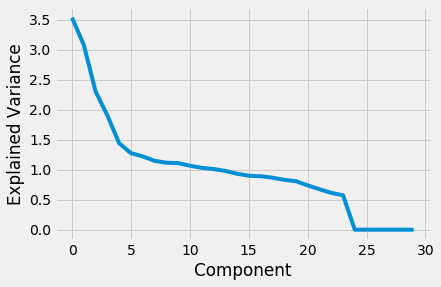

In [32]:
plt.style.use('fivethirtyeight')
plt.plot(range(0, len(pca_30.explained_variance_)), pca_30.explained_variance_)
plt.xlabel("Component")
plt.ylabel("Explained Variance")
plt.show()

Graph above shows that atleast 6 features do not explain the variance in the model

To make sure no features were dropped from the model we use the equation below which should equate to ~1:

In [33]:
print(np.sum(pca_30.explained_variance_)/np.sum(np.var(x_train_std, axis=0)))

1.0009624639076027


# Fit the Data with PCA = 0.95

In [34]:
pca_95 = PCA(n_components = 0.95)

pca_95.fit(x_train_std)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
print(np.sum(pca_95.explained_variance_)/np.sum(np.var(x_train_std, axis=0)))

0.9613981361157004


~95% of our variance in the labels is explained by the new reduced features

In [36]:
pca_95.components_.shape

(22, 30)

8 features have been dropped from the model

## Now We Train on a Transformed and Scaled Data Set With PCA = 0.95

In [37]:
x_train_transformed = pca_95.fit(x_train_std).transform(x_train_std)
x_test_transformed = pca_95.transform(x_test_std)

print(x_test_transformed.shape)
print(x_train_transformed.shape)

(260, 22)
(1040, 22)


In [38]:
clf_PCA = ExtraTreesClassifier(n_estimators=100, random_state=42)

clf_PCA.fit(x_train_transformed, y_train)

y_predictions = clf_PCA.predict(x_test_transformed)

In [39]:
print(accuracy_score(y_test, y_predictions))

0.6576923076923077


In [40]:
print (cross_val_score(clf_PCA, x_train_transformed, y_train, cv=4, scoring = 'accuracy'))

[0.61685824 0.65769231 0.69230769 0.69111969]


Classifier performance degraded from the baseline with 30 features, but maybe tuning the hyperparameters will improve the performance

## Find the best Hyperparameters (PCA = 0.95, Data Scaled)

In [41]:
#use RandomizedSearchCV

n_estimators3 = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

max_features3 = ['log2', 'sqrt']
max_features3.append(None)

max_depth3 = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth3.append(None)

min_samples_split3 = [2, 5, 10]

min_samples_leaf3 = [1, 2, 4]

bootstrap3 = [True, False]

param_grid_3 = {'n_estimators': n_estimators3,
               'max_features': max_features3,
               'max_depth': max_depth3,
               'min_samples_split': min_samples_split3,
               'min_samples_leaf': min_samples_leaf3,
               'bootstrap': bootstrap3} 
print(param_grid_3)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['log2', 'sqrt', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [42]:
clf_RCV_PCA = ExtraTreesClassifier(random_state = 42)
clf_RCV_PCA = RandomizedSearchCV(estimator = clf_RCV_PCA, param_distributions = param_grid_3, cv = 3, verbose = 2, 
                                  random_state = 42 , n_iter = 300, n_jobs = -1, scoring = 'accuracy')
clf_RCV_PCA.fit(x_train_transformed, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators='warn',
                                                  n_jobs=None, oob_sco...
            

In [43]:
clf_RCV_PCA.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [44]:
accuracy_score(y_test,clf_RCV_PCA.predict(x_test_transformed))

0.6576923076923077

In [45]:
cross_val_score(clf_RCV_PCA.best_estimator_, x_train_transformed, y_train, cv=4, scoring = 'accuracy')

array([0.68965517, 0.65769231, 0.70384615, 0.70656371])

The CV score after a random search for the best hyperparameters yielded worse results than the basic model, therefore a gridsearch is not necessary (unlikely to improve over basic model).

As we are going to see, if we do not scale the data before applying PCA, we will get a more accurate classifier with less components needed to explain 95% of the variance (14 instead of 22)

# Train on Transformed Data without Scaling

In [46]:
pca_train = PCA(n_components = 0.95)

pca_train.fit(train_set_features)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
x_train_transformed2 =  pca_train.fit(train_set_features).transform(train_set_features)
x_train_transformed2.shape

(1040, 14)

In [48]:
x_test_transformed2 = pca_train.transform(test_set_features)
x_test_transformed2.shape

(260, 14)

We only need 14 components to explain 95% of the variance in the data in this case

Since Random Forest classifiers are somewhat invariant to feature scaling, it is not a problem if we do not scale the data

To check that we only need 14 components on the original non scaled data, we redo the explained variance - component graph

In [49]:
pca_301 = PCA(n_components = 30)

pca_301.fit(train_set_features)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

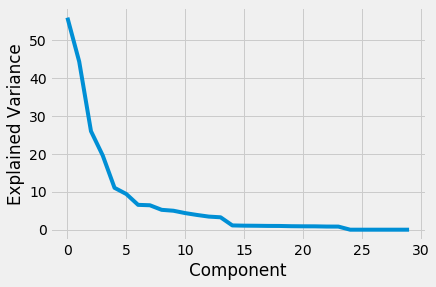

In [50]:
plt.style.use('fivethirtyeight')
plt.plot(range(0, len(pca_301.explained_variance_)), pca_301.explained_variance_)
plt.xlabel("Component")
plt.ylabel("Explained Variance")
plt.show()

As we can see, we can reduce the number of components to 14, instead of 22, without losing too much information

Now we fit a new classfier on the unscaled transformed data and test it

In [51]:
clf_PCA2 = ExtraTreesClassifier(n_estimators=100, random_state=42)

clf_PCA2.fit(x_train_transformed2, train_set_labels)

y_predictions2 = clf_PCA2.predict(x_test_transformed2)

In [52]:
print(accuracy_score(test_set_labels, y_predictions2))

0.8076923076923077


In [53]:
print (cross_val_score(clf_PCA2, x_train_transformed2, train_set_labels, cv=5, scoring = 'accuracy'))

[0.81339713 0.77990431 0.83653846 0.83091787 0.79710145]


Performance has dramatically improved on unscaled data when reducing it, Now we tune the hyperparameters again using random and grid search

## Tuning the reduced model

In [54]:
n_estimators4 = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

max_features4 = ['log2', 'sqrt']
max_features4.append(None)

max_depth4 = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth4.append(None)

min_samples_split4 = [2, 5, 10]

min_samples_leaf4 = [1, 2, 4]

bootstrap4 = [True, False]



param_grid_4 = {'n_estimators': n_estimators4,
               'max_features': max_features4,
               'max_depth': max_depth4,
               'min_samples_split': min_samples_split4,
               'min_samples_leaf': min_samples_leaf4,
               'bootstrap': bootstrap4} 
print(param_grid_4)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['log2', 'sqrt', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [55]:
clf_RCV_14 = ExtraTreesClassifier(random_state = 42)
clf_RCV_14 = RandomizedSearchCV(estimator = clf_RCV_14, param_distributions = param_grid_4, cv = 3, verbose = 2, 
                                  random_state = 42 , n_iter = 300, n_jobs = -1, scoring = 'accuracy')
clf_RCV_14.fit(x_train_transformed2, train_set_labels)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators='warn',
                                                  n_jobs=None, oob_sco...
            

In [56]:
clf_RCV_14.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [57]:
test_set_predictions_RCV_14 = clf_RCV_14.best_estimator_.predict(x_test_transformed2)
print(accuracy_score(test_set_labels, test_set_predictions_RCV_14))

0.8153846153846154


In [58]:
cross_val_score(clf_RCV_14.best_estimator_, x_train_transformed2, y_train, cv=5, scoring = 'accuracy')

array([0.81818182, 0.81818182, 0.79326923, 0.82125604, 0.80676329])

The cv score and classifier accuracy are the best yet, now we search in a more specific grid based on the random results given

In [59]:
# Create the parameter grid based on the results of random search 
param_grid_5 = {
    'bootstrap': [False],
    'max_depth': [ 20, 30, 40, 60, 80, None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [2,3,4,5],
    'n_estimators': [ 600, 700, 800, 900, 1000],
    'criterion':['gini']
}

In [60]:
clf_GCV_14 = ExtraTreesClassifier(random_state = 42)
clf_GCV_14 = GridSearchCV(estimator = clf_GCV_14, param_grid = param_grid_5, cv = 4, verbose = 2, 
                                    n_jobs = -1, scoring = 'accuracy')
clf_GCV_14.fit(x_train_transformed2, train_set_labels)

Fitting 4 folds for each of 480 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  2.7min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=Fal...42,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gin

In [61]:
clf_GCV_14.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 1000}

# Accuracy Measures of Tuned Classifier with PCA = 0.95, Data Unscaled

In [62]:
test_set_predictions_GCV_14 = clf_GCV_14.best_estimator_.predict(x_test_transformed2)
print(accuracy_score(test_set_labels, test_set_predictions_GCV_14))

0.8153846153846154


In [63]:
print(cross_val_score(clf_GCV_14.best_estimator_, x_train_transformed2, y_train, cv=5, scoring = 'accuracy'))

[0.84688995 0.80382775 0.8125     0.79710145 0.80193237]


In [64]:
precision_score(y_test, test_set_predictions_GCV_14, average = 'weighted')

0.8182960975989164

In [65]:
recall_score(y_test, test_set_predictions_GCV_14, average = 'weighted')

0.8153846153846154

In [66]:
f1_score(y_test, test_set_predictions_GCV_14, average = 'weighted')

0.816036634368982

This is the most accurate classifier we found so far, lastly we will try to use different number of principal components to understand wether it increases the classifier accuracy or not (All on unscaled data)

# Trying Different Number of Components

In [67]:
# try on 13 components

pca_13 = PCA(n_components=13, random_state=42)

pca_13.fit(train_set_features)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [68]:
x_train_13 =  pca_13.fit(train_set_features).transform(train_set_features)
x_train_13.shape

(1040, 13)

In [69]:
x_test_13 = pca_13.transform(test_set_features)
x_test_13.shape

(260, 13)

In [70]:
#fit a model train, and compare with PCA = 14

clf_13 = ExtraTreesClassifier(random_state=42, n_estimators=100)

clf_13.fit(x_train_13, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [71]:
y_pred_13 = clf_13.predict(x_test_13)
print(accuracy_score(y_test, y_pred_13))

0.7961538461538461


In [72]:
print(cross_val_score(clf_13, x_train_13, y_train, cv=5, scoring = 'accuracy'))

[0.79425837 0.77990431 0.81730769 0.75362319 0.7826087 ]


Accuracy and CV score decreased relative to untuned classifier with 14 components, now we will try and increase number of components

In [73]:
# try on 15 components

pca_15 = PCA(n_components=15, random_state=42)

pca_15.fit(train_set_features)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [74]:
x_train_15 =  pca_15.fit(train_set_features).transform(train_set_features)
x_train_15.shape

(1040, 15)

In [75]:
x_test_15 = pca_15.transform(test_set_features)
x_test_15.shape

(260, 15)

In [76]:
#fit a model train, and compare with PCA = 14

clf_15 = ExtraTreesClassifier( n_estimators=100, random_state=42)

clf_15.fit(x_train_15, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [77]:
y_pred_15 = clf_15.predict(x_test_15)
print(accuracy_score(y_test, y_pred_15))

0.8115384615384615


In [78]:
print(cross_val_score(clf_15, x_train_15, y_train, cv=5, scoring = 'accuracy'))

[0.79425837 0.74641148 0.79326923 0.75362319 0.79710145]


Accuracy and CV score are comparable/better than the untuned classifier with pca=14, lets check pca=16

In [79]:
pca_16 = PCA(n_components=16, random_state=42)

pca_16.fit(train_set_features)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [80]:
x_train_16 =  pca_16.fit(train_set_features).transform(train_set_features)
x_train_16.shape

(1040, 16)

In [81]:
x_test_16 = pca_16.transform(test_set_features)
x_test_16.shape

(260, 16)

In [82]:
#fit a model train, and compare with PCA = 14 & 15

clf_16 = ExtraTreesClassifier( n_estimators=100, random_state=42)

clf_16.fit(x_train_16, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [83]:
y_pred_16 = clf_16.predict(x_test_16)
print(accuracy_score(y_test, y_pred_16))

0.7961538461538461


In [84]:
print(cross_val_score(clf_16, x_train_16, y_train, cv=5, scoring = 'accuracy'))

[0.79425837 0.80382775 0.77403846 0.76811594 0.77777778]


Accuracy and CV scores degraded again, so we will lastly tune the classifier with pca=15 and compare that with the best one we have found thus far (pca=14, tuned)

## Tune Hyperparameters of Classifier with PCA = 15, unscaled data

Again, start with a randomized search then focus on a grid search

In [85]:
n_estimators6 = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

max_features6 = [ 'sqrt']
max_features6.append(None)

max_depth6 = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth6.append(None)

min_samples_split6 = [2, 5, 10]

min_samples_leaf6 = [1, 2, 4]

bootstrap6 = [True, False]

param_grid_6 = {'n_estimators': n_estimators6,
               'max_features': max_features6,
               'max_depth': max_depth6,
               'min_samples_split': min_samples_split6,
               'min_samples_leaf': min_samples_leaf6,
               'bootstrap': bootstrap6} 
print(param_grid_6)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['sqrt', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [86]:
clf_RCV_15 = ExtraTreesClassifier(random_state = 42)
clf_RCV_15 = RandomizedSearchCV(estimator = clf_RCV_15, param_distributions = param_grid_6, cv = 3, verbose = 2, 
                                  random_state = 42 , n_iter = 300, n_jobs = -1, scoring = 'accuracy')
clf_RCV_15.fit(x_train_15, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators='warn',
                                                  n_jobs=None, oob_sco...
            

In [87]:
clf_RCV_15.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [88]:
print(accuracy_score(y_test, clf_RCV_15.best_estimator_.predict(x_test_15)))

0.8192307692307692


In [89]:
cross_val_score(clf_RCV_15.best_estimator_, x_train_15, y_train, cv=5, scoring = 'accuracy')

array([0.82296651, 0.80861244, 0.79807692, 0.80193237, 0.8115942 ])

We have the best Accuracy and Scores thus far, next we do a grid search

In [90]:
# Create the parameter grid based on the results of random search 
param_grid_7 = {
    'bootstrap': [False],
    'max_depth': [ 30, 40, 50, 60, 70, 80, None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [2,3,4,5],
    'n_estimators': [1000, 1300, 1500, 1800],
    'criterion':['gini']
}

In [91]:
clf_GCV_15 = ExtraTreesClassifier(random_state = 42)
clf_GCV_15 = GridSearchCV(estimator = clf_GCV_15, param_grid = param_grid_7, cv = 4, verbose = 2, 
                                    n_jobs = -1, scoring = 'accuracy')
clf_GCV_15.fit(x_train_15, y_train)

Fitting 4 folds for each of 448 candidates, totalling 1792 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1792 out of 1792 | elapsed:  4.4min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=Fal...,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'

In [92]:
clf_GCV_15.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

## Accuracy Measures of Classifier with PCA = 15, Unscaled Data

In [93]:
test_set_predictions_GCV_15 = clf_GCV_15.best_estimator_.predict(x_test_15)
print(accuracy_score(y_test, test_set_predictions_GCV_15))

0.8423076923076923


In [94]:
print(cross_val_score(clf_GCV_15.best_estimator_, x_train_15, y_train, cv=5, scoring = 'accuracy'))

[0.8277512  0.80861244 0.80288462 0.79227053 0.82125604]


In [95]:
precision_score(y_test, test_set_predictions_GCV_15, average = 'weighted')

0.8461739758467521

In [96]:
recall_score(y_test, test_set_predictions_GCV_15, average = 'weighted')

0.8423076923076923

In [97]:
f1_score(y_test, test_set_predictions_GCV_15, average = 'weighted')

0.842490877995385

Therefore, the most accurate model found was when applying a PCA = 15 on the unscaled data set, resulting in an analysis of the 15 most important features and dropping 15 unecessary ones, which obtain higher scores than any other classifier tested in this notebook

## Summary for Accuracy Differences Between Classifiers

In [98]:
from sklearn.pipeline import Pipeline

pipeline_baseline = Pipeline([('scalar1',StandardScaler()),
                     ('clf',clf)])

pipeline_baseline_tuned = Pipeline([('scalar2',StandardScaler()),
                     ('clf_GCV',clf_GCV.best_estimator_)])


pipeline_pca_scaled_tuned = Pipeline([('scalar3',StandardScaler()),
                     ('pca_train',PCA(n_components=0.95)),
                     ('clf_RCV_PCA',clf_RCV_PCA.best_estimator_)])


pipeline_pca_no_scale_tuned = Pipeline([('pca_15',PCA(n_components=15)),
                     ('clf_GCV_15',clf_GCV_15.best_estimator_)])


#create extra pipeline for unscaled data with no PCA to check scaling does not degrade performance if PCA is not applied

pipeline_no_scale = Pipeline([('clf_no_scale', ExtraTreesClassifier(random_state=42, n_estimators=100))])


In [99]:
pipelines = [pipeline_no_scale, pipeline_baseline, pipeline_baseline_tuned, pipeline_pca_scaled_tuned, pipeline_pca_no_scale_tuned]

best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [100]:
#Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Basic Classifier no Scaling', 1: 'Basic Classifier with Scaling', 2: 'Tuned Classifier',
             3: 'Tuned Classifier with PCA and Scaling', 4: 'Tuned Classifier with PCA & No Scaling'}

for pipe in pipelines:
    pipe.fit(train_set_features, y_train)
    
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(test_set_features,y_test)))

Basic Classifier no Scaling Test Accuracy: 0.7307692307692307
Basic Classifier with Scaling Test Accuracy: 0.7307692307692307
Tuned Classifier Test Accuracy: 0.7384615384615385
Tuned Classifier with PCA and Scaling Test Accuracy: 0.6576923076923077
Tuned Classifier with PCA & No Scaling Test Accuracy: 0.8423076923076923


Scaling the data set does not make a difference if PCA is not applied, as evidenced by the equal test accuracies in the first 2 classifiers above

In [101]:
for i,model in enumerate(pipelines):
    if model.score(test_set_features,y_test)>best_accuracy:
        best_accuracy=model.score(test_set_features,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy: {}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy: Tuned Classifier with PCA & No Scaling


# PCA with 2 components (For Visualisation)

In [102]:
pca_2 = PCA(n_components=2)

pca_2.fit(train_set_features)

x_train_2 = pca_2.transform(train_set_features)
x_test_2 = pca_2.transform(test_set_features)

print(x_train_2.shape)
print(x_test_2.shape)

(1040, 2)
(260, 2)


In [103]:
clf_PCA_2 = ExtraTreesClassifier(n_estimators = 100, random_state=42)

clf_PCA_2.fit(x_train_2, train_set_labels)

pred = clf_PCA_2.predict(x_test_2)

In [104]:
np.sum(pca_2.explained_variance_)/np.sum(np.var(train_set_features, axis=0))

0.46888037306329966

0.47 variance explained only using 2 components

In [105]:
accuracy_score(y_test, pred)

0.4576923076923077

only 0.45 accuracy with the 2 most important components

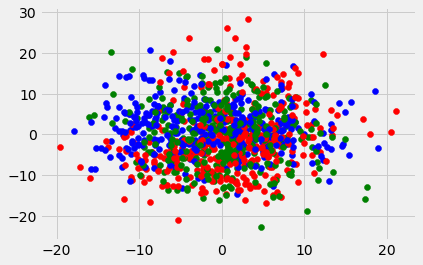

In [106]:
plt.style.use('fivethirtyeight')
x = x_train_2
y = y_train.values
for i in range(1040):
    if y[i]==0:
        plt.scatter(x[i,1],x[i,0],c='r')
    elif y[i]==1:
        plt.scatter(x[i,1],x[i,0],c='g')
    elif y[i]==2:
        plt.scatter(x[i,1],x[i,0],c='b')
plt.show()

We see no discernable way of realising a pattern for the labels based on just 2 components, which is not surprising given that random guessing on an equal distribution for 3 labels would result in an accuracy of 0.33, not far off from 0.45

Notice Low CV, Recall, Percision, and f1 scores

In [107]:
cross_val_score(clf_PCA_2, x_train_2, y_train, cv=5, scoring = 'accuracy')

array([0.43062201, 0.36842105, 0.40384615, 0.29468599, 0.36714976])

In [108]:
precision_score(y_test, pred, average = 'weighted')

0.45762338208986636

In [109]:
recall_score(y_test, pred, average = 'weighted')

0.4576923076923077

In [110]:
f1_score(y_test, pred, average = 'weighted')

0.4576473234367971

## ROC Curve Comparison between models

Because all the classifiers are multiclass, we will use macro and micro averaging to get the roc curves for comparing classifiers

### ROC Curve for Basic Model Without Hyperparameter Tuning (Our Baseline)

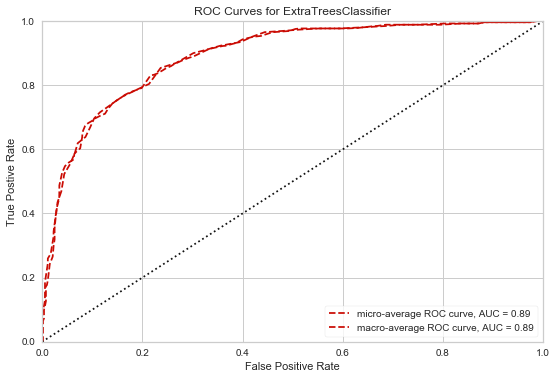

In [111]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf, classes=["0", "1", "2"], marco = True, per_class = False, micro = True)

visualizer.fit(x_train_std, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test_std, y_test)        # Evaluate the model on the test data
visualizer.show()                           # Finalize and render the figure

### ROC Curve for Model after Hyperparameter Tuning (no PCA)

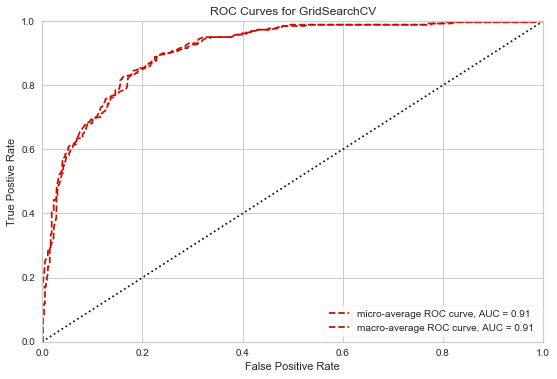

In [112]:
visualizer2 = ROCAUC(clf_GCV, classes=["0", "1", "2"], marco = True, per_class = False, micro = True)

visualizer2.fit(x_train_std, y_train)        
visualizer2.score(x_test_std, y_test)        
visualizer2.show()           

### ROC Curve for Model after Hyperparameter Tuning (with PCA = 0.95, with scaling data)

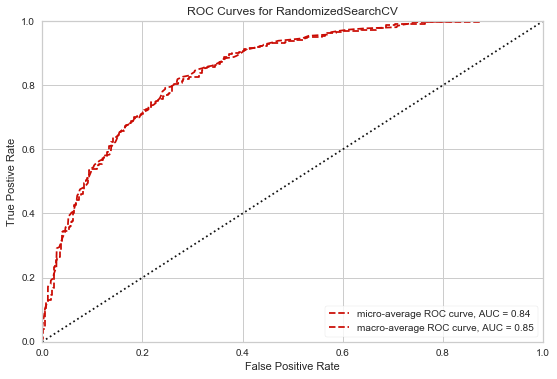

In [113]:
visualizer3 = ROCAUC(clf_RCV_PCA, classes=["0", "1", "2"], marco = True, per_class = False, micro = True)

visualizer3.fit(x_train_transformed, y_train)        
visualizer3.score(x_test_transformed, y_test)      
visualizer3.show()                          

significant accuracy degredation when we scale the data and apply PCA = 0.95

### ROC Curve for Model after Hyperparameter Tuning (with PCA=15, without scaling data) (Best Model Found)

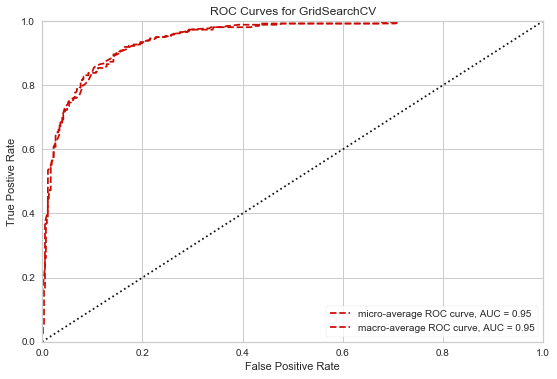

In [114]:
visualizer4 = ROCAUC(clf_GCV_15, classes=["0", "1", "2"], marco = True, per_class = False, micro = True)

visualizer4.fit(x_train_15, y_train)        
visualizer4.score(x_test_15, y_test)      
visualizer4.show()                                    

Highest ROC curve found

### ROC Curve for model with Just 2 Principal Components

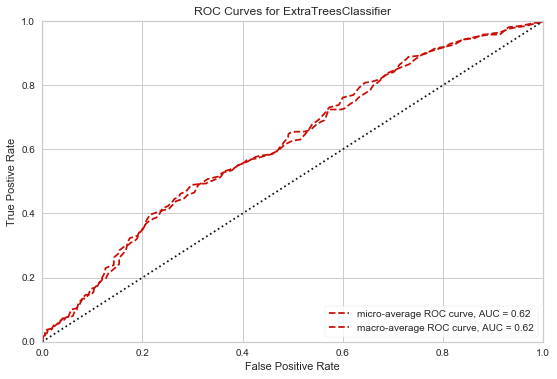

In [115]:
visualizer5 = ROCAUC(clf_PCA_2, classes=["0", "1", "2"], marco = True, per_class=False, micro = True)

visualizer5.fit(x_train_2, y_train)        
visualizer5.score(x_test_2, y_test)      
visualizer5.show()                                 

With just 2 components, model prediction is still better than random guessing, but not by much, which explains why we couldn't clearly notice a pattern in the scatter plot with PCA = 2

## Confusion matrix comparison between baseline classifier and best classifier found

### Baseline Model Confusion Matrix

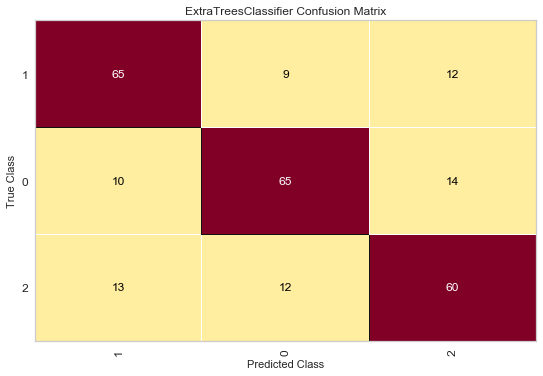

<Figure size 576x396 with 0 Axes>

In [116]:
from yellowbrick.classifier import confusion_matrix

confusion_matrix(
    clf,
    x_train_std, y_train, x_test_std, y_test,
    classes=['1', '0', '2']
)
plt.tight_layout()

### Best Model Confusion Matrix

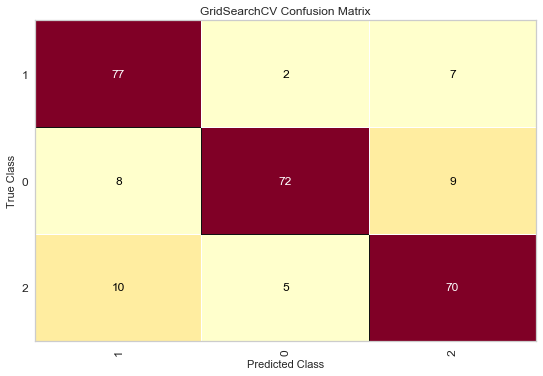

<Figure size 576x396 with 0 Axes>

In [117]:
confusion_matrix(
    clf_GCV_15,
    x_train_15, y_train, x_test_15, y_test,
    classes=['1', '0', '2']
)
plt.tight_layout()

As we can see, there are less misclassifications in the best model we found when compared to the baseline one with no hyperparameter tuning

## Conclusion

The best classifier found was the ExtraTrees classifier when applying PCA=15 to the unscaled data set, which dropped 15 components from the model, and then using RandomizedSearchCV to scan a large hyperparameter grid to have an idea where the best performance lies, then using a more specific, smaller parameter grid with GridSearchCV to find the optimal hyperparameters, which reults in the highest AUCROC, Cross_val and Accuracy scores

The highest accuracy achieved was 84%, an 11% improvement from the baseline model with no tuning or use of PCA

It was also found that scaling the data did not affect model accuracy if PCA was not applied afterwards, however if we reduce the dimensions via PCA, scaling before doing so severely reduces model performance

The best parameters found are:

In [118]:
clf_GCV_15.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

The best pipeline is:

In [119]:
print(best_pipeline)

Pipeline(memory=None,
         steps=[('pca_15',
                 PCA(copy=True, iterated_power='auto', n_components=15,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf_GCV_15',
                 ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                      criterion='gini', max_depth=30,
                                      max_features='sqrt', max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=1000, n_jobs=None,
                                      oob_score=False, random_state=42,
                                      verbose=0, warm_start=False))],
         verbose=False)


The number of principal components used was 15